# Tarea 05: Ejercicios Unidad 02 B Método de Newton y de la Secante
### CONJUNTO DE EJERCICIOS

- Mateo Molina Moises Estrella

**Link Repositorio:** https://github.com/R3LM15/MetodosNumericos_MateoMolina




1. Sea 𝑓(𝑥) = $ -x^3 -cos(x) $ y $𝑝_0 = −1$. Use el método de Newton y de la Secante para encontrar 𝑝2. ¿Se podría usar $𝑝_0$ = 0?

### Método de Newton
$$ x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}  , n \ge  1$$
- Dado $p_0$ = -1 

𝑓(x)  = $ -x^3 -cos(x) $

𝑓'(x) = $ -3x^2 + sen(x) $

Iteración 1:  $$ x_1 = -1 - \frac{0.45969}{-3.84147} = -0.88033$$

𝑓(-1)  = $ -(-1)^3 -cos(-1) = 0.45969$

𝑓'(-1) = $ -3(-1)^2 + sen(-1) = -3.84147$

Iteración 2:  $$ x_2 = -0.88033 - \frac{0.04534}{-3.09589} = -0.86568$$

𝑓(-0.88033)  = $ -(-0.88033)^3 -cos(-0.88033) = 0.04534$

𝑓'(-0.88033) = $ -3(-0.88033)^2 + sen(-0.88033) = -3.09589$

Por lo tanto sabemos que $p_2 = -0.86568$

- Dado $p_0$ = 0

𝑓(0)  = $ -(0)^3 -cos(0) = -1 $

𝑓'(0) = $ -3(0)^2 + sen(0) = 0 $

El método de Newton falla, porque dividiríamos por cero.

### Método de la Secante

- Dado $p_0$ = -1 y eleguido $p_1$ = -1.5 

$$ x_n = x_{n-1} - f(x_{n-1}) * \frac{x_{n-1} - x_{n-2}}{f(x_{n-1})-f(x_{n-2})}  $$ 

Cálculos:  

𝑓(-1.5)  = $ -(-1.5)^3 -cos(-1.5) = 3.30426 $

𝑓(-1)  = $ -(-1)^3 -cos(-1) = 0.45969 $

$$ x_2 = -1.5 - 3.30426 * \frac{-1.5 - (-1)}{3.30426-0.45969} = -0.91919 $$ 

Por lo tanto sabemos que $p_2 = -0.91919$

- Dado $p_0$ = 0 y eleguido $p_1$ = 1

𝑓(0)  = $ -(0)^3 -cos(0) = -1 $

𝑓(1)  = $ -(1)^3 -cos(1) = -1.54030 $

$$ x_2 = 1 - (-1.5403) * \frac{1 - 0}{-1.5403-(-1)} = -1.85082$$




2. Encuentre soluciones precisas dentro de $10^{-4}$ para los siguientes problemas. 

    a. $x^{3} - 2x^{2}-5 = 0$ , [1,4]      
    
     b. $x^{3} - 3x^{2} - 1 = 0$, [-3,-2]

     c. $ x-cosx=0 $, [0,$\pi$/2]

     d. $ x-0.8-0.2senx =0 $,[0,$\pi$/2]

In [1]:
import numpy as np
## metodo de secante (Dos puntos)
def secante(f, x0, x1, tol=1e-4, max_iter=100):
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)

        if fx1 - fx0 == 0:
            print("División por cero en iteración.")

        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)

        if abs(x2 - x1) < tol:
            return x2  # raíz aproximada

        x0, x1 = x1, x2

    print("No converge dentro del número máximo de iteraciones.")


In [2]:
#a)
# Definir la función f(x)
def f(x):
    return x**3-2*x**2-5

a = secante(f, x0=1, x1=4)
print("a | Raíz aproximada:", a)

#--------------------------------------------------------------

#b)
# Definir la función f(x)
def f(x):
    return x**3-3*x**2-1

b = secante(f, x0=-3, x1=-2)
print("b | Raíz aproximada:", b)

#--------------------------------------------------------------

#c)
# Definir la función f(x)
def f(x):
    return x-np.cos(x)

c = secante(f, x0=0, x1=(np.pi/2))
print("c | Raíz aproximada:", c)

#--------------------------------------------------------------

#d)
# Definir la función f(x)
def f(x):
    return x-0.8-0.2*np.sin(x)

d = secante(f, x0=0, x1=(np.pi/2))
print("d | Raíz aproximada:", d)

a | Raíz aproximada: 2.690647447883773
b | Raíz aproximada: 3.103803339266244
c | Raíz aproximada: 0.739085133034638
d | Raíz aproximada: 0.964333884548886


3. Use los 2 métodos en esta sección para encontrar las soluciones dentro de $10^{-5}$ para los siguientes problemas.

    a. $3x-e^{x}=0$ para $1 \le  x \le 2$

    b. $ 2x +3cosx - e^{x} =0 $ para $ 1 \le x \le 2  $

In [3]:
from scipy.optimize import newton
## A)

def f(x):
    return 3*x - np.exp(x)

def fprime(x):
    return 3 - np.exp(x)

x1=1
x0=2

print("\n a)")
a = newton(f, x0, fprime, tol=1e-5)
print("| Newton-Raphson | Raíz aproximada:", a)

a = secante(f, x0, x1)
print("| Secante | Raíz aproximada:", a)

## --------------------------------------------------------------------
## B)

def f(x):
    return 2*x + 3*np.cos(x) -  np.exp(x)

def fprime(x):
    return 2 - 3*np.sin(x) - np.exp(x)

x1=1
x0=2

print("\n b)")
b = newton(f, x0, fprime, tol=1e-5)
print("| Newton-Raphson | Raíz aproximada:", b)

b = secante(f, x0, x1)
print("| Secante | Raíz aproximada:", b)


 a)
| Newton-Raphson | Raíz aproximada: 1.5121345516685927
| Secante | Raíz aproximada: 0.6190612866166071

 b)
| Newton-Raphson | Raíz aproximada: 1.2397146979752176
| Secante | Raíz aproximada: 1.239714698599015


4. El polinomio de cuarto grado
$$𝑓(𝑥) = 230𝑥^{4} + 18𝑥^{3} + 9𝑥^{2} − 221𝑥 − 9$$ 
tiene dos ceros reales, uno en [−1,0] y el otro en [0,1]. Intente aproximar estos ceros dentro de $10^{-6}$ con

a. El método de la secante (use los extremos como las estimaciones iniciales)

b. El método de Newton (use el punto medio como estimación inicial)

In [4]:
## A 

def f(x):
    return 230*x**4+18*x**3 +9*x**2-221*x-9

def fprime(x):
    return 920*x**3+54*x**2 +18*x -221


print("\n a)")
a = secante(f, x0=-1, x1=0,tol=1e-6)
print("| Secante | Raíz aproximada:", a)

a = secante(f, x0=0, x1=1,tol=1e-6)
print("| Secante | Raíz aproximada:", a)

## --------------------------------------------------------------------
## B)


print("\n b)")
x0 = - 0.5
b = newton(f, x0, fprime, tol=1e-6)
print("| Newton-Raphson | Raíz aproximada:", b)
x0 = 0.5
b = newton(f, x0, fprime, tol=1e-6)
print("| Newton-Raphson | Raíz aproximada:", b)


 a)
| Secante | Raíz aproximada: -0.040659288315725135
| Secante | Raíz aproximada: -0.04065928831557162

 b)
| Newton-Raphson | Raíz aproximada: -0.04065928831575899
| Newton-Raphson | Raíz aproximada: -0.040659288315758865


5. La funcion $f(x)=tan(\pi x)-6 $ tiene cero en $1 / \pi arcontangente 6 \approx 0.447431543$. Sea $p_0 = 0$ y $p_1 = 0.48$ y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué?

    a. método de bisección

    b. método de Newton

    c. método de la secante


In [5]:
# Algoritmo de bisección
def bisection_method(f, a, b, tol=1e-5, max_iter=100):
    # Verificar que los signos de f(a) y f(b) sean opuestos
    if f(a) * f(b) >= 0:
        print("No se puede aplicar el método de bisección. Los signos de f(a) y f(b) deben ser opuestos.")
        return None
    
    iter_count = 0
    while (b - a) / 2.0 > tol:
        # Punto medio
        c = (a + b) / 2.0
        # Verificar si el punto medio es una raíz
        if f(c) == 0:
            return c
        # Actualizar el intervalo
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        
        iter_count += 1
        if iter_count > max_iter:
            print("Se alcanzó el número máximo de iteraciones.")
            return None
    
    return (a + b) / 2.0

In [6]:
def f(x):
    return np.tan(np.pi*x) - 6

def fprime(x):
    return np.pi/(np.cos(np.pi * x) ** 2)

a = bisection_method(f, 0, 0.48, max_iter=100)
print("A) | Bisección | Raíz aproximada:", a)

x0 = 0.48
b = newton(f, x0, fprime, maxiter=10)
print("B) | Newton-Raphson | Raíz aproximada:", b)


c = secante(f, x0=0, x1=0.48, max_iter=100)
print("C) | Secante | Raíz aproximada:", c)

A) | Bisección | Raíz aproximada: 0.44742919921874996
B) | Newton-Raphson | Raíz aproximada: 0.4474315432887487
No converge dentro del número máximo de iteraciones.
C) | Secante | Raíz aproximada: None


6. La función descrita por $f(x) = ln(x^{2}+1) -e^{0.4x} cos𝜋𝑥$ tiene un número infinito de ceros.

    a. Determine, dentro de $10^{-6}$, el único cero negativo.

    b. Determine, dentro de $10^{−6}$, los cuatro ceros positivos más pequeños.

    c. Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de 𝑓. [Sugerencia: Dibuje una gráfica aproximada de 𝑓.]

    d. Use la parte c) para determinar, dentro de $10^{−6}$, el vigesimoquinto cero positivo más pequeño de 𝑓.


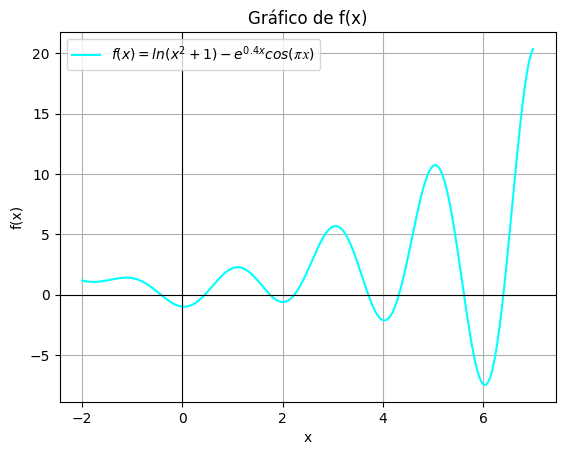

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función f(x)
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

# Definir el rango de valores para x
x = np.linspace(-2, 7, 800)
y = f(x)

# Graficar la función con la línea de puntos
plt.plot(x, y, label=r'$f(x) = ln(x^{2}+1) -e^{0.4x} cos(𝜋𝑥)$', color='cyan')

# Agregar título y etiquetas
plt.title('Gráfico de f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Mostrar la cuadrícula y los ejes
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)  # Eje X
plt.axvline(0, color='black', linewidth=0.8)  # Eje Y

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()  

In [8]:
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)


a = bisection_method(f, -1, 0,tol=1e-6)
print("A) | Bisección | Raíz aproximada:", a)

b = bisection_method(f, 0, 1,tol=1e-6)
print("A) | Bisección | Raíz aproximada:", b)

c = bisection_method(f, 1, 2,tol=1e-6)
print("A) | Bisección | Raíz aproximada:", c)

d = bisection_method(f, 2, 2.5,tol=1e-6)
print("A) | Bisección | Raíz aproximada:", d)

e = bisection_method(f, 3.5, 3.9,tol=1e-6)
print("A) | Bisección | Raíz aproximada:", e)

A) | Bisección | Raíz aproximada: -0.4341421127319336
A) | Bisección | Raíz aproximada: 0.4506559371948242
A) | Bisección | Raíz aproximada: 1.7447385787963867
A) | Bisección | Raíz aproximada: 2.2383203506469727
A) | Bisección | Raíz aproximada: 3.7090415954589844


7. La función 𝑓(𝑥) = $ 𝑥^{1/3} $ tiene raíz en 𝑥 = 0. Usando el punto de inicio de 𝑥 = 1 y $𝑝_0$ = 5, $𝑝_1$ = 0.5 para el método de secante, compare los resultados de los métodos de la secante y de Newton.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22284\2201156426.py:6: RuntimeWarning: invalid value encountered in power
  return x**(1/3)


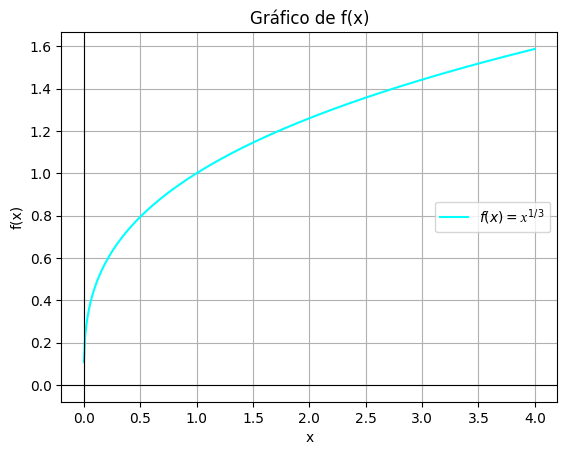

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función f(x)
def f(x):
    return x**(1/3)

# Definir el rango de valores para x
x = np.linspace(-5, 4, 800)
y = f(x)

# Graficar la función con la línea de puntos
plt.plot(x, y, label=r'$f(x) =𝑥^{1/3} $', color='cyan')

# Agregar título y etiquetas
plt.title('Gráfico de f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Mostrar la cuadrícula y los ejes
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)  # Eje X
plt.axvline(0, color='black', linewidth=0.8)  # Eje Y

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [10]:
def f(x):
    return x**(1/3)

def fprime(x):
    return (1/3) * x**(-2/3)
x0 = 1
a = newton(f, x0, fprime)
print("-> | Newton-Raphson | Raíz aproximada:", a)

b = secante(f, x0=5, x1=0.5)
print("-> | Secante | Raíz aproximada:", b)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22284\3167459035.py:2: RuntimeWarning: invalid value encountered in scalar power
  return x**(1/3)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22284\3167459035.py:5: RuntimeWarning: invalid value encountered in scalar power
  return (1/3) * x**(-2/3)


RuntimeError: Failed to converge after 50 iterations, value is nan.